In [60]:
!pip install natasha

     ---------------------------------------- 34.4/34.4 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 41.1/41.1 kB ? eta 0:00:00
     ---------------------------------------- 49.4/49.4 kB ? eta 0:00:00
     ---------------------------------------- 55.5/55.5 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 8.2/8.2 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=573833216159577b38242896125b669f8c4918fadde6afbef6994d7a33f3a7f0
  Stored in directory: c:\users\дом.desktop-a3u9to1\appdata\local\pip\cache\wheels\fc\ab\d4\5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26100 sha256=7d93d2151f23b3669fce5

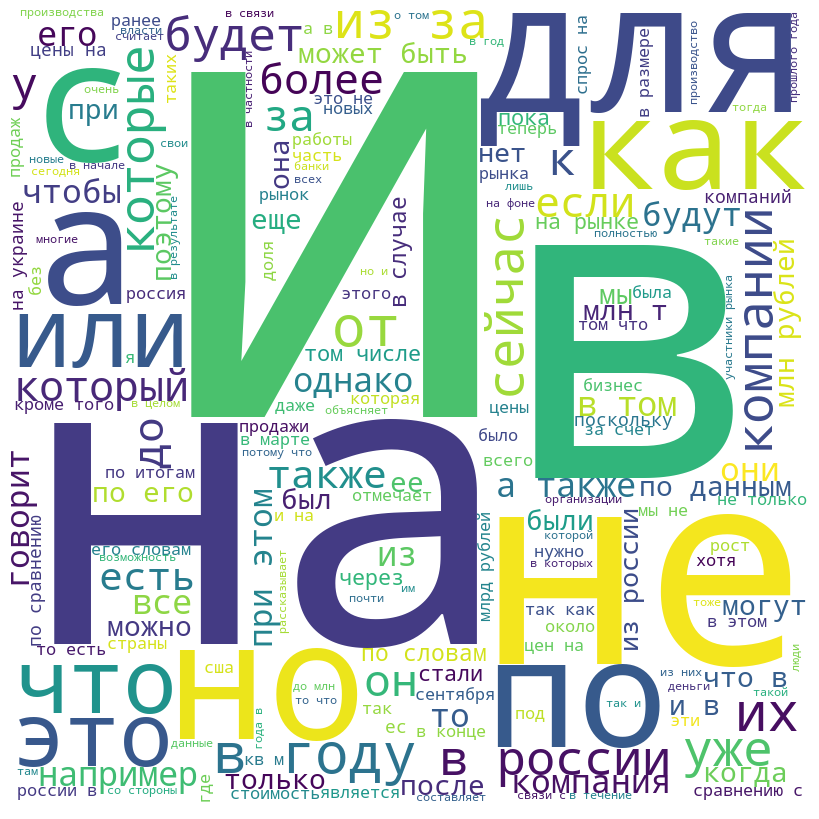

In [59]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import natasha
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"merged_data.csv", encoding ="utf-8")

comment_words = ''
stopwords = set(STOPWORDS)
set1 = []

# iterate through the csv file
for i in range(len(df)):
    text = df['text'][i]
    #print(type(text))
    text = str(text).lower().split(" '.,«»*-+")


    for j in text:
        set1 += [j]

sp = list(set1)

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(" ".join(sp))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()